# Importations

In [1]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-image

Requirement already up-to-date: scikit-image in /opt/anaconda3/lib/python3.7/site-packages (0.17.2)
Note: you may need to restart the kernel to use updated packages.


In [58]:
import imageio
import numpy
from matplotlib.pyplot import *
from skimage import filters
import mrlab as mr
import matplotlib.pyplot as plt

import skimage.morphology as morpho  
import skimage.feature as skf
from scipy import ndimage as ndi

from skimage.morphology import label


# Importation des images

In [33]:
bat = imread('bat.bmp')

lena = imread('lena.tif')

im2 = imread('paysage.jpg')
grand_paysage =im2[:,:,2]

im3 = imread('photo.png')
petit_paysage =im3[:,:,2]

# Gradients

In [34]:
def gradient_sobel(im,sigma,seuilnorme):  #sigma=0  seuilnorme=0.3
    gfima=filters.gaussian(im,sigma)
    gradx=mr.sobelGradX(gfima)
    grady=mr.sobelGradY(gfima)

    norme=np.sqrt(gradx*gradx+grady*grady)
    return(norme)

def gradient_morpho(im):
    se = se=morpho.selem.disk(1)

    return morpho.dilation(im,se)-morpho.erosion(im,se)

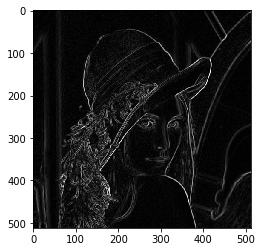

In [61]:
sobel_lena = gradient_sobel(lena, 0, 0.3)
plt.imshow(grad, cmap = 'gray')

# Création cellules

In [111]:
def taille_bande_separante(test,taille_cellule):
    n=0
    m=taille_cellule
    while test[n][taille_cellule//2]>0:
        n+=1
    while test[m][0]>0:
        m-=1
    return(m-n)
    



#taille_cellule est le nombre de pixels que l'on veut par cellule
def creation_cellules(im,taille_cellule, bande_separante_min):
    n,m=np.shape(im)[0],np.shape(im)[1]
    M=np.zeros((n,m))
    
    for i in range(1,n//taille_cellule):                             #cette boucle sert à mettre des points tout à gauche, et tout à droite
        if i%2==0:
            M[i*taille_cellule][taille_cellule//2]=255
        else :
            M[i*taille_cellule][0],M[i*taille_cellule][m-1]=255,255
            
    for j in range(m//taille_cellule):
            M[0][j*taille_cellule+taille_cellule//2],M[n-1][j*taille_cellule+taille_cellule//2] = 255,255

    for i in range(1,n//taille_cellule):
        for j in range(1,m//taille_cellule):
            if i%2==0:
                M[i*taille_cellule][j*taille_cellule+taille_cellule//2]=255
            else:
                M[i*taille_cellule][j*taille_cellule]=255
                
    #dilatation de M:
    se=[[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]] #cet élément structurant est un hexagone

    test=M
    k=0
    t=(taille_bande_separante(test,taille_cellule)>=bande_separante_min)
    while (t):
        test=morpho.dilation(test,se)
        t=(taille_bande_separante(test,taille_cellule)>=bande_separante_min)
        k+=1
    
    for i in range(k-1):
        M=morpho.dilation(M,se) 
    
    #S=superposition(im,M)
    return M


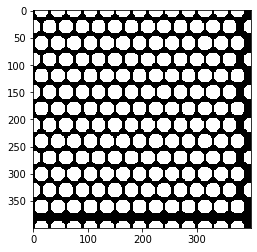

In [112]:
bande_separante_min=2
taille_cellule = 30
M=creation_cellules(petit_paysage,taille_cellule,bande_separante_min)
plt.imshow(M,cmap='gray')

# Minimum du gradient

In [121]:
from collections import Counter


def min_grad(grad,taille_cellule,bande_separante_min): 
    M = creation_cellules(grad,taille_cellule,bande_separante_min)
    n,m = np.shape(grad)
    label1 = label(M)
    min_grad = 0*np.ones((n,m))
    norme = grad
    
    for k in range(np.max(label1)):
        im_tmp = 0*np.ones((n,m))
        for i in range(n):
            for j in range(m):
                if label1[i][j] == k:
                    im_tmp[i][j] = norme[i][j]
        
        min = np.min(im_tmp[np.nonzero(im_tmp)])
        tmp2 = 0*np.ones((n,m))
    
        for i in range(n):
            for j in range(m):
                if im_tmp[i][j] == min:
                    tmp2[i][j] = 255
                    
        label2 = label(tmp2)
        label2_whithout_zero = []
    
        for i in range(n):
            for j in range(m):
                if label2[i][j] != 0:
                    label2_whithout_zero.append(label2[i][j])
                
        mostcommon = Counter(label2_whithout_zero).most_common(1)
    
        for i in range(n):
            for j in range(m):
                if label2[i][j] == mostcommon[0][0]:
                    min_grad[i][j] = 255
                    
    return min_grad
                
    
    
    
    

# Tests

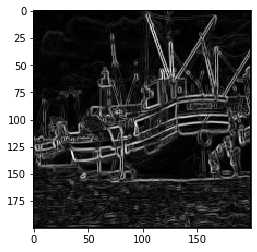

In [122]:
sobel_bat = gradient_sobel(bat,0,0.3)
plt.imshow(sobel_bat, cmap = 'gray')

In [123]:
A = creation_cellules(bat,20,2)

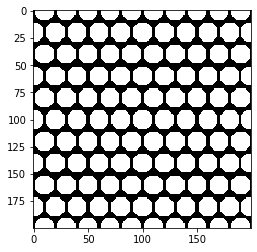

In [124]:
plt.imshow(A, cmap='gray')

In [119]:
min_grad_bat = min_grad(sobel_bat,20,2)

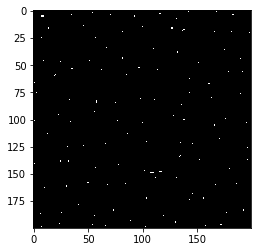

In [125]:
plt.imshow(min_grad_bat,cmap='gray')

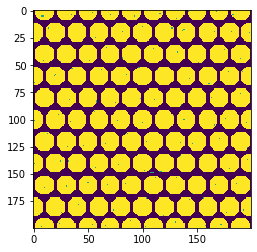

In [133]:
cells = creation_cellules(bat,20,2)


for i in range(200):
    for j in range(200):
        if min_grad_bat[i][j] == 255:
            cells[i][j] = 150
            
plt.imshow(cells)

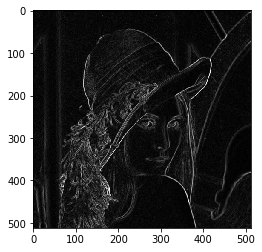

In [134]:
morpho_lena = gradient_morpho(lena)
plt.imshow(morpho_lena, cmap = 'gray')

In [149]:
cells2 = creation_cellules(lena,32,2)

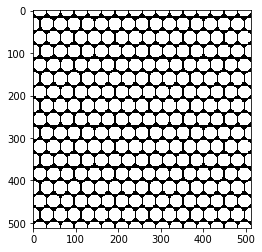

In [144]:
plt.imshow(cells, cmap='gray')

In [145]:
min_grad_lena = min_grad(morpho_lena,30,2)

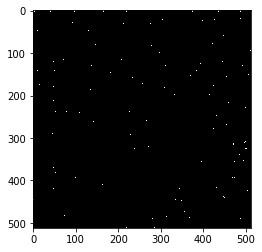

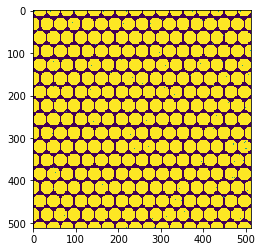

In [150]:
n,m = np.shape(lena)

for i in range(n):
    for j in range(m):
        if min_grad_lena[i][j] == 255:
            cells2[i][j] = 150


plt.figure()
plt.imshow(min_grad_lena, cmap = 'gray')
plt.figure()
plt.imshow(cells2)